In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Find IOU

In [2]:
def findIOU(label_img, pred_img):
    intersection = np.logical_and(label_img, pred_img)
    union = np.logical_or(label_img, pred_img)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

### Set Image to find IOU Score

In [3]:
image_no = 1

### Resnet 50

In [4]:


pred_cc_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/resnet-50-out-cc-updated-1/image_{image_no}_cc.png'
label_cc_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/label_626_gt_updated_1/image_{image_no}_cc.tif'
label_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/label_626_gt/image_{image_no}_gt.tif'
pred_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/resnet-50-out/image_{image_no}_pred_binary.png'

In [5]:
label_original_img = cv.imread(label_path, cv.IMREAD_GRAYSCALE)
label_original_img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

### Original, Center Cut - Label Image

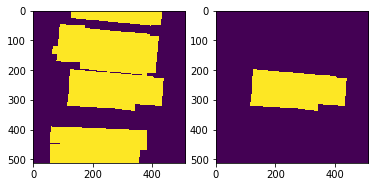

In [60]:

lbl_cc_img = cv.imread(label_cc_path, cv.IMREAD_GRAYSCALE)
label_original_img = cv.imread(label_path, cv.IMREAD_GRAYSCALE)

fig = plt.figure()
img1 = fig.add_subplot(1,2,1)
img1.imshow(label_original_img)

img2 = fig.add_subplot(1,2,2)
img2.imshow(lbl_cc_img)


### Original and Center cut - Prediction Image

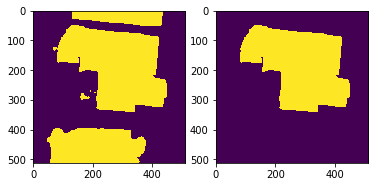

In [61]:
pred_cc_img = cv.imread(pred_cc_path, cv.IMREAD_GRAYSCALE)
pred_original_img = cv.imread(pred_path, cv.IMREAD_GRAYSCALE)

fig = plt.figure()
img3 = fig.add_subplot(1,2,1)
# plt.imshow(pred_original_img)
# plt.show()
img3.imshow(pred_original_img) 

img4 = fig.add_subplot(1,2,2)
img4.imshow(pred_cc_img)
# plt.imshow(pred_cc_img)
# plt.show()

# print(pred_bw_img.shape, np.unique(pred_bw_img))
# plt.imshow(pred_bw_img)

In [23]:
np.unique(pred_original_img)

array([ 30, 215], dtype=uint8)

In [70]:
np.unique(pred_cc_img)

array([  0, 255], dtype=uint8)

### IOU score - with Center Cut

In [13]:
print(findIOU(lbl_cc_img, pred_cc_img))

0.5382862433014652


### IOU score - Without Center Cut

In [11]:
print(findIOU(label_original_img, pred_original_img))

0.9861227821660945


### compare LABEL and PRED images

In [18]:
np.array_equal(pred_bw_img, lbl_bw_img)

False